In [10]:
import os, shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imageio

In [11]:
original_dataset_dir = 'C:/Users/abc/Desktop/Datasets/Covid_data'
base_dir = 'C:/Users/abc/Desktop/Datasets/Covid_data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_corona_dir = os.path.join(train_dir, 'corona')
train_normal_dir = os.path.join(train_dir, 'normal')
validation_corona_dir = os.path.join(validation_dir, 'corona')
validation_normal_dir = os.path.join(validation_dir, 'normal')
test_corona_dir = os.path.join(test_dir, 'corona')
test_normal_dir = os.path.join(test_dir, 'normal')

In [12]:
print('total training corona images:', len(os.listdir(train_corona_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total validation corona images:', len(os.listdir(validation_corona_dir)))
print('total validation normal images:', len(os.listdir(validation_normal_dir)))

total training corona images: 120
total training normal images: 124
total validation corona images: 10
total validation normal images: 10


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [15]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [16]:
train_datagen =  ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=10, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=3, class_mode='binary')

Found 244 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)
[0. 1. 0. 1. 0. 1. 1. 1. 1. 1.]


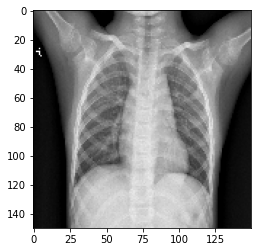

In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    plt.imshow(data_batch[1])
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch)
    break

In [18]:
history = model.fit(
train_generator,
steps_per_epoch=10,
epochs=10,
validation_data=validation_generator,
validation_steps=5)

Train for 10 steps, validate for 5 steps
Epoch 1/10
10/10 [==============================] - 15s 2s/step - loss: 0.6868 - acc: 0.5900 - val_loss: 0.6181 - val_acc: 0.7333
Epoch 2/10
10/10 [==============================] - 12s 1s/step - loss: 0.6496 - acc: 0.6064 - val_loss: 0.5319 - val_acc: 1.0000
Epoch 3/10
10/10 [==============================] - 13s 1s/step - loss: 0.6105 - acc: 0.6900 - val_loss: 0.4633 - val_acc: 0.9333
Epoch 4/10
10/10 [==============================] - 14s 1s/step - loss: 0.4985 - acc: 0.8511 - val_loss: 0.3353 - val_acc: 0.9333
Epoch 5/10
10/10 [==============================] - 15s 1s/step - loss: 0.3710 - acc: 0.9255 - val_loss: 0.2153 - val_acc: 1.0000
Epoch 6/10
10/10 [==============================] - 14s 1s/step - loss: 0.3073 - acc: 0.9200 - val_loss: 0.2445 - val_acc: 0.9333
Epoch 7/10
10/10 [==============================] - 15s 1s/step - loss: 0.2627 - acc: 0.9100 - val_loss: 0.1920 - val_acc: 0.9333
Epoch 8/10
10/10 [==============================]

In [19]:
model.save('corona_normal_1.h5')

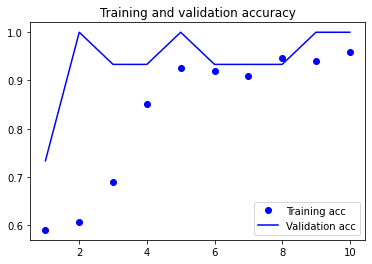

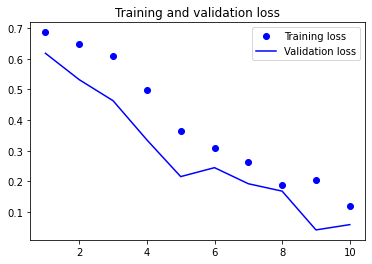

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 20 images belonging to 2 classes.
test acc: 1.0
